![](IMG_5137.jpg)

# Homework 2: Part I

![](IMG_5137.jpg)

![](IMG_5137.jpg)

![](IMG_5137.jpg)

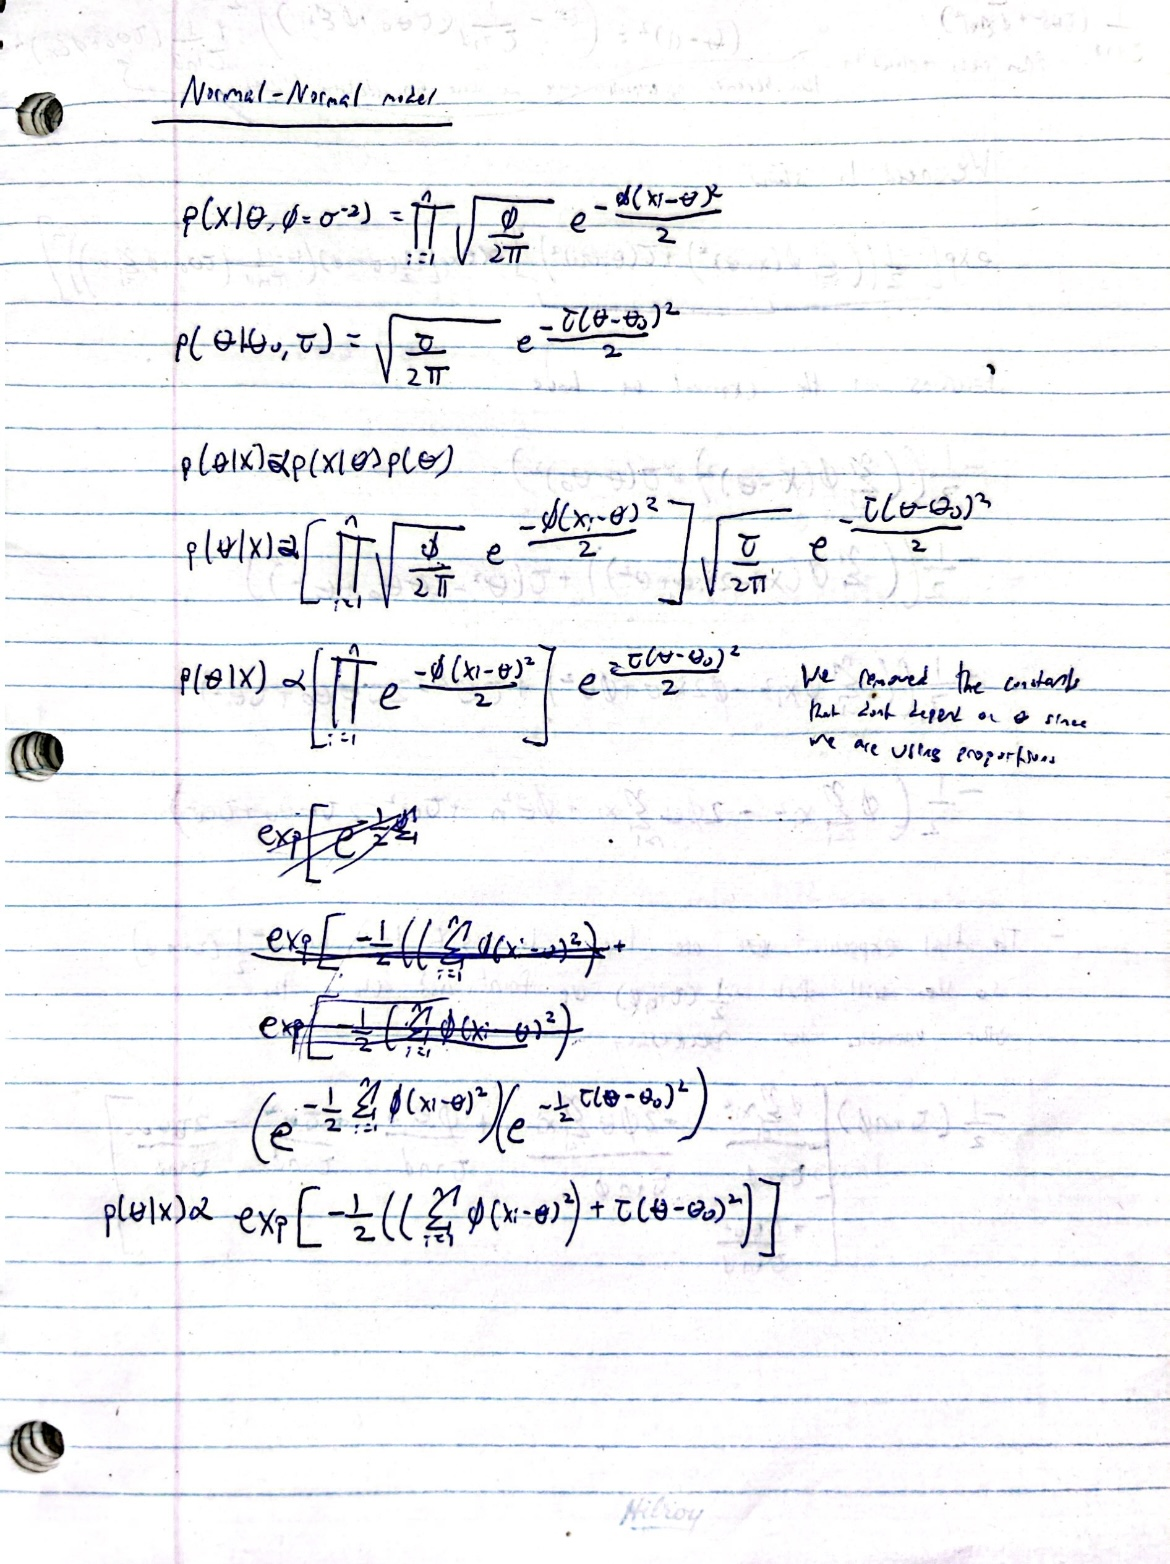

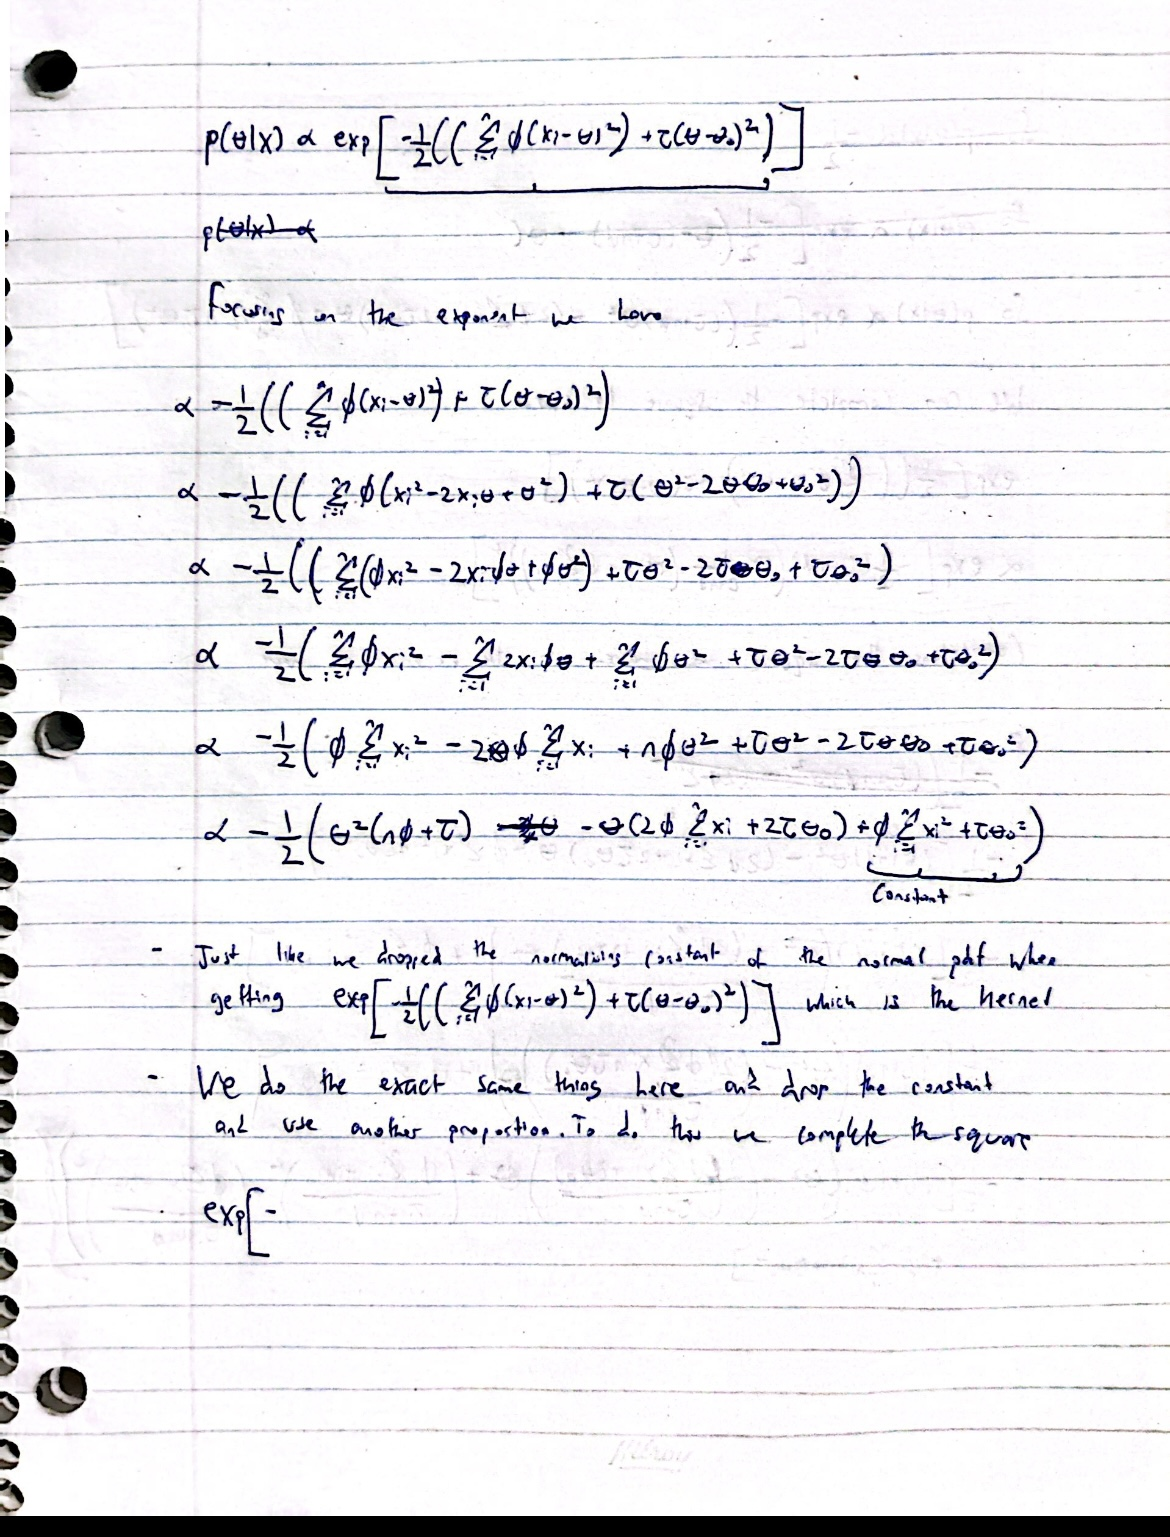

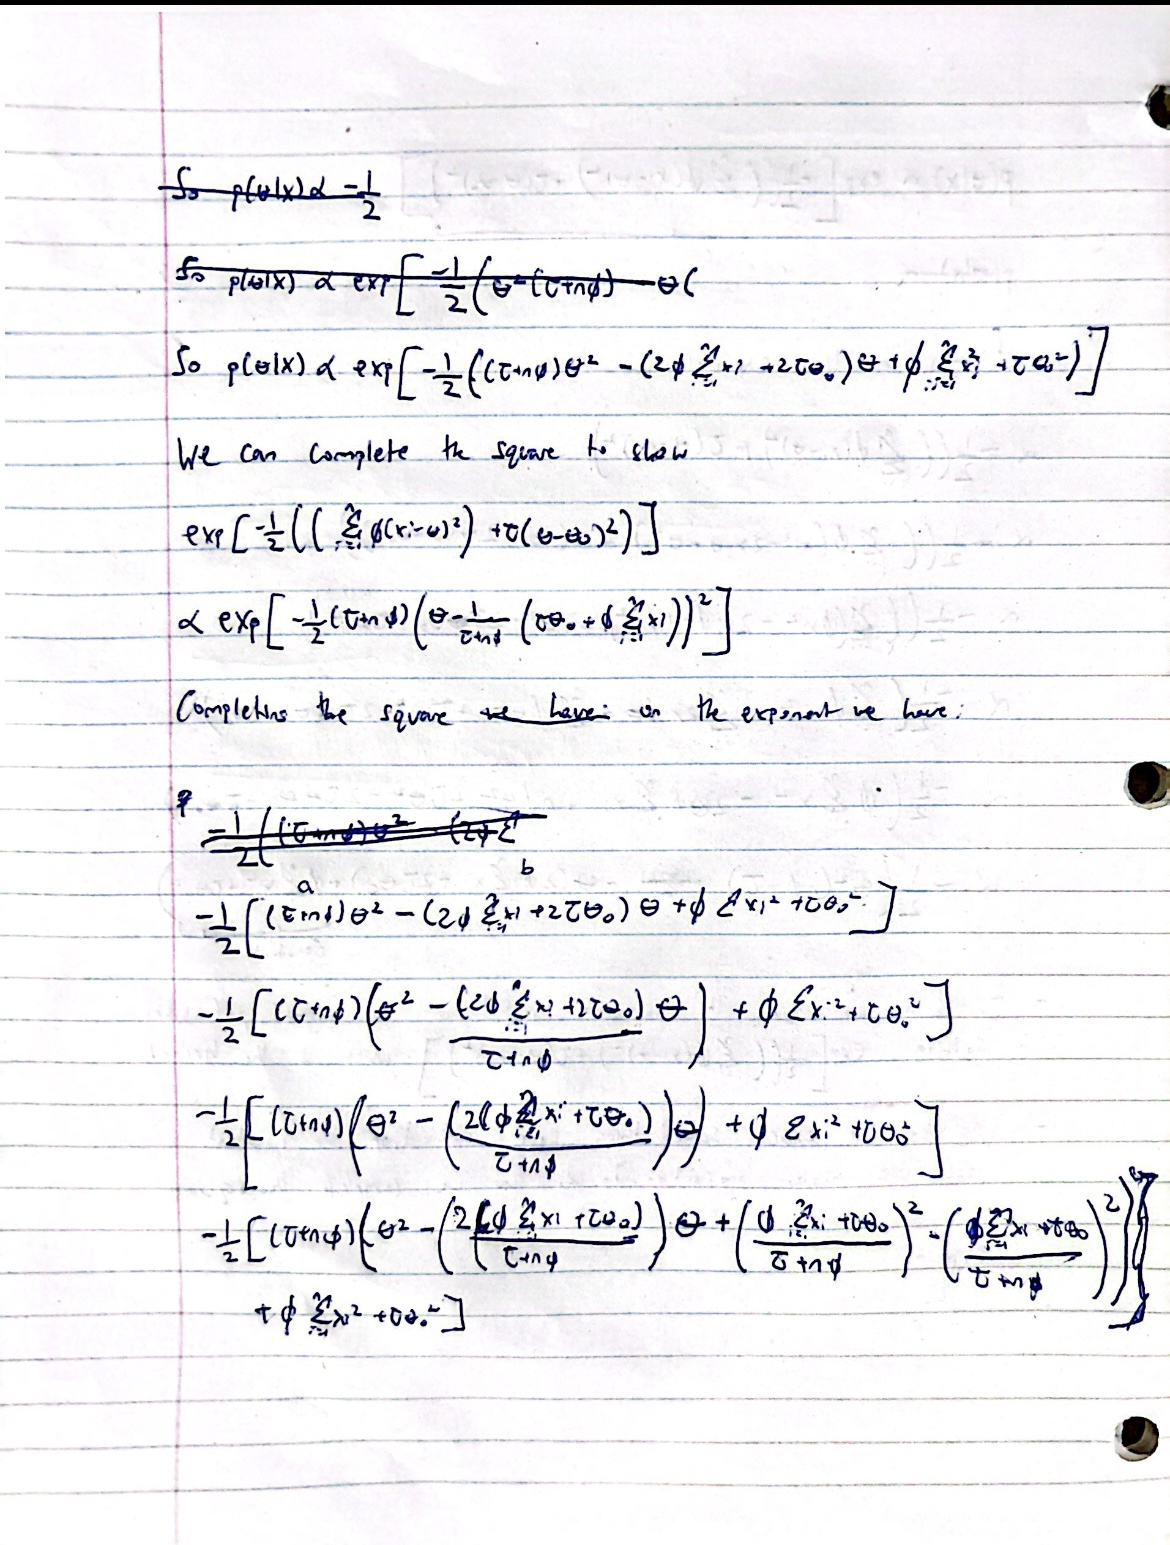

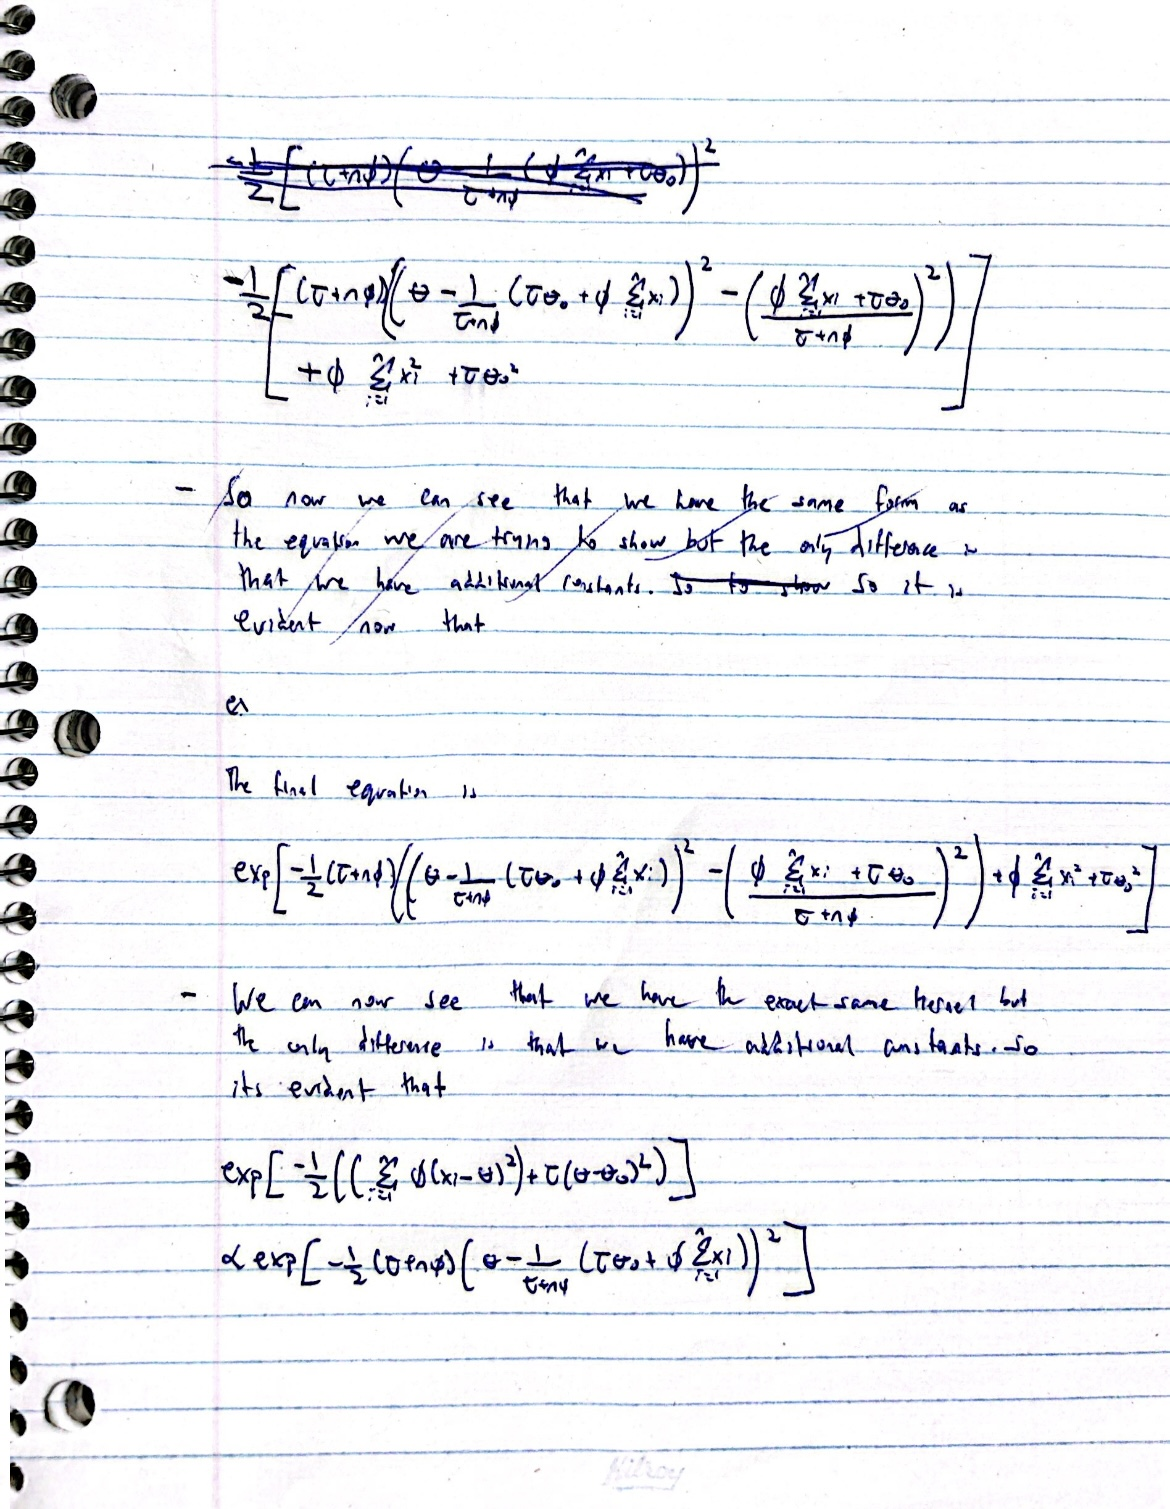

# Homework #2 Part II: Complete the following... 

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?

4.What’s the difference between a log likelihood and log posterior when an improper prior
is used? Hint: is has something to do with the log of the marginal likelihood constant.
[Or, another way to start thinking about this is to instead as the question: What’s the
difference between a likelihood and posterior when an improper prior is used? Hint: is
has something to do with the marginal likelihood constant.]

<!-- posterior proporitional to joint... --> 

In [20]:
# Loading packages
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
from functools import reduce
import operator
import math

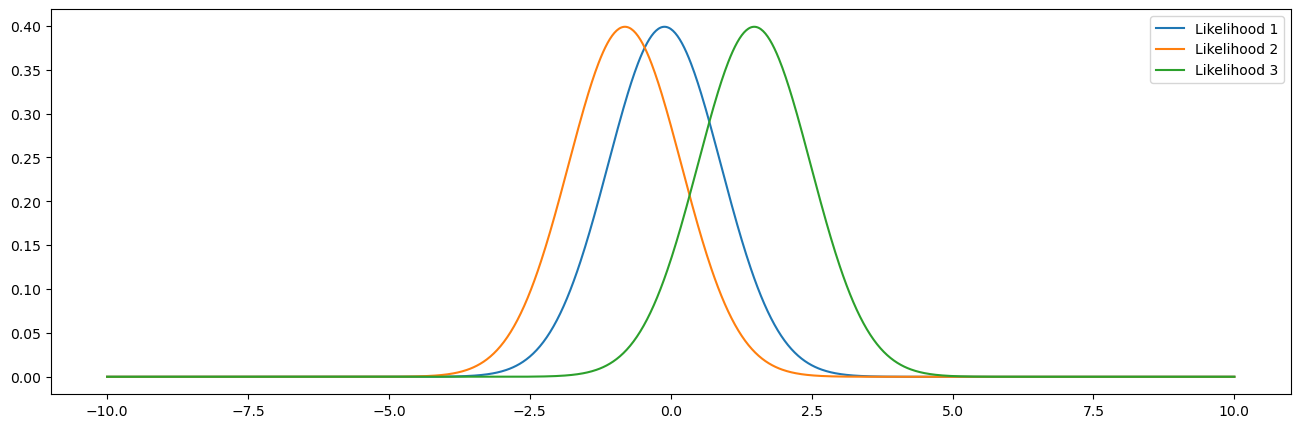

In [21]:
# Question 1

likelihood = [0,0,0]
parameter_domain = np.linspace(-10,10,1001)
samples = [0,0,0]

for i in range(3):
    x = stats.norm(loc=0,scale=1).rvs(1)
    samples[i] = x
    likelihood[i] = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1)

plt.figure(figsize=(16,5))

for i in range(3):
    plt.plot(parameter_domain, np.squeeze(likelihood[i]), label = f'Likelihood {i+1}')

plt.legend()




# Product
#plt.plot(parameter_domain,np.squeeze(reduce(operator.mul,likelihood)))

# We get a sample from the normal distribution with mean 0 and std. deviation one and we are plotting
# the individual likelihoods. So if we got x = 0.5 then obviously the point of max likelihood will be the mean
# itself so if x = 0.5 then at theta/mean = 0.5 we will get max likelihood

In [22]:
samples # Ensuring that the max likelihood occurs at the mean where mean = xi 

[array([-0.11090893]), array([-0.81234415]), array([1.4817263])]

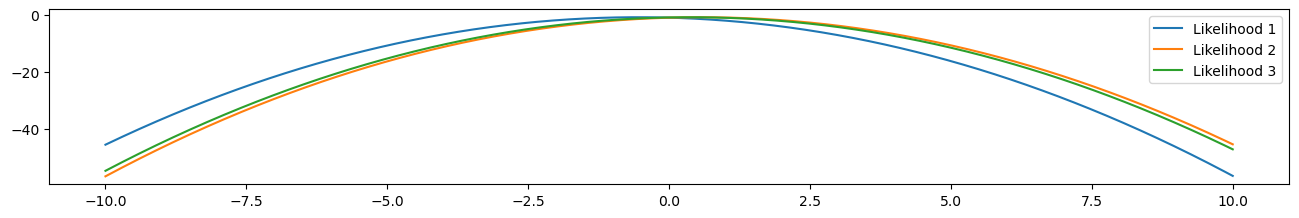

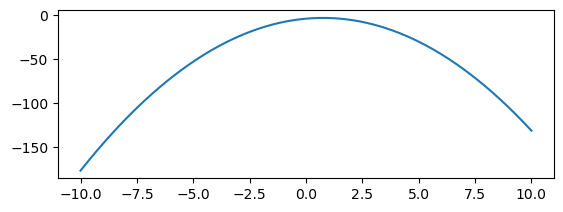

In [23]:
# Question 2 part a

# Plotting individual log-normal likelihoods and the joint log-normal likelihood

loglikelihood = [0,0,0]
parameter_domain = np.linspace(-10,10,1001)
samples = [0,0,0]

for i in range(3):
    x = stats.norm(loc=0,scale=1).rvs(1)
    samples[i] = x
    loglikelihood[i] = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1)

plt.figure(figsize=(16,5))

plt.subplot(2,1,1)

for i in range(3):
    plt.plot(parameter_domain, np.squeeze(loglikelihood[i]), label = f'Likelihood {i+1}')
    
plt.legend()
plt.show()

plt.subplot(2,1,2)
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); parameter_domain = np.linspace(-10,10,1001); 
loglikelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).sum(axis=0)


plt.plot(parameter_domain, loglikelihood, label = f'Joint-log-normal Likelihood')


In [24]:
n = 3
c = np.log(1/(2*pi)**0.5)
loglikelihoods = []
theta = 10

for i in range(n):
    loglikelihoods.append(c - 1/2*(samples[i]-theta)**2)

loglikelihoods


[array([-56.53706726]), array([-45.46515893]), array([-47.22625445])]

In [25]:
# Loglikelihood with multiple data points
pi = math.pi
n=3
s = samples
theta = 10
c = n*np.log(1/(2*pi)**0.5)
a = []

for i in range(n):
    a.append((s[i]-theta)**2)

log_prod = c + -0.5*sum(a)
log_prod


array([-149.22848065])

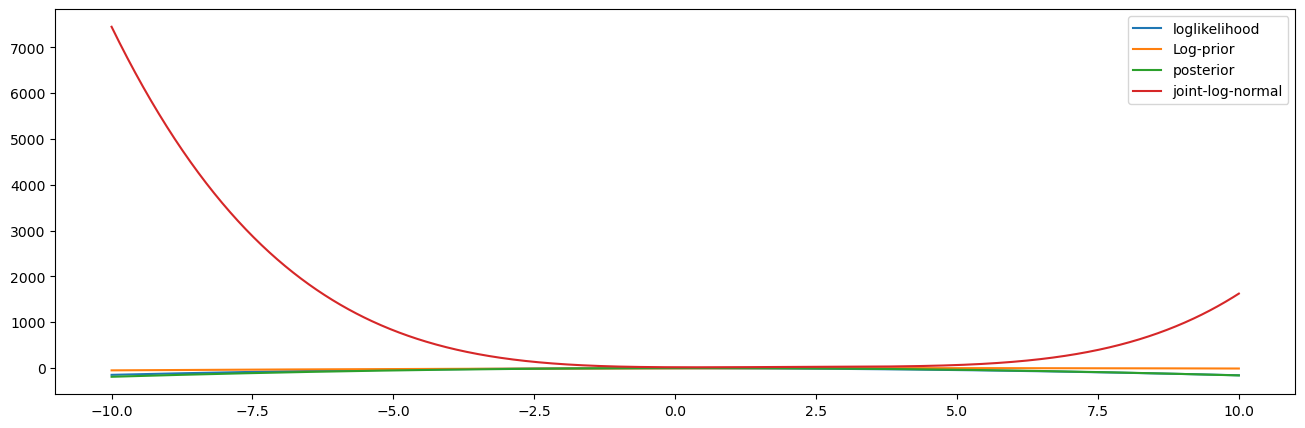

In [27]:
# Question 2 part b

# Plotting the joint log-normal likelihood with n = 3

n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 

logprior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)

loglikelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).sum(axis=0) 

posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)
# We use sum now instead of prod since we are in the log space

c = 1
jointlognormal = c*logprior*loglikelihood
plt.figure(figsize=(16,5))

plt.plot(parameter_domain, loglikelihood, label = f'loglikelihood');plt.plot(parameter_domain, logprior, label = f'Log-prior');plt.plot(parameter_domain,posterior, label = f'posterior');plt.plot(parameter_domain, jointlognormal , label = f'joint-log-normal')
    
plt.legend()
plt.show()


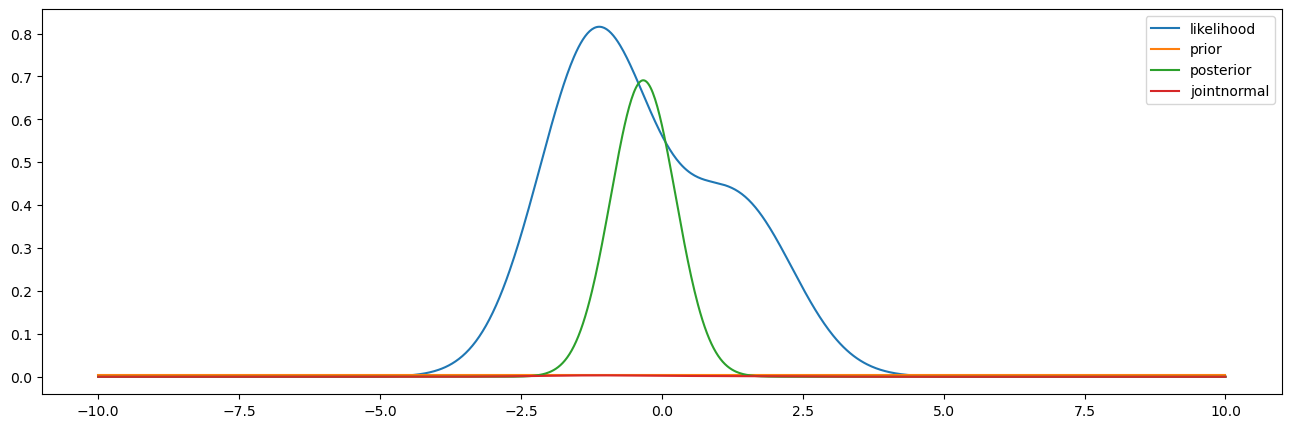

In [35]:
# Question 3
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/10000; parameter_domain = np.linspace(-10,10,1001); 

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).sum(axis=0) 

posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
# We use sum now instead of prod since we are in the log space

c = 1
jointnormal = c*prior*likelihood
plt.figure(figsize=(16,5))

plt.plot(parameter_domain, likelihood, label = f'likelihood');plt.plot(parameter_domain, prior, label = f'prior');plt.plot(parameter_domain,posterior, label = f'posterior');plt.plot(parameter_domain, jointnormal , label = f'jointnormal')
    
plt.legend()
plt.show()

# The posterior is a normal distribution 